This file should serve to read in the prepared data, separate it into X and y and try out the first models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dateiName = "23_22_21-eu_combustion.csv"
fields = np.arange(19)
df = pd.read_csv(dateiName, sep = ",", nrows= 15000000, usecols = fields,  index_col =0, header = 0)
df.info()

C:\Users\user\AppData\Local\Temp\ipykernel_3796\150770408.py:7: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dateiName, sep = ",", nrows= 15000000, usecols = fields,  index_col =0, header = 0)


<class 'pandas.core.frame.DataFrame'>
Index: 15000000 entries, 56002959 to 46441491
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   member_state                 object 
 1   manufacturer_name_eu         object 
 2   vehicle_type                 object 
 3   commercial_name              object 
 4   category_of_vehicle          object 
 5   fuel_type                    object 
 6   fuel_mode                    object 
 7   innovative_technologies      object 
 8   mass_vehicle                 float64
 9   weltp_test_mass              float64
 10  engine_capacity              float64
 11  engine_power                 float64
 12  erwltp                       float64
 13  year                         int64  
 14  electric_range               float64
 15  electric_energy_consumption  float64
 16  fuel_consumption             float64
 17  specific_co2_emissions       float64
dtypes: float64(9), int64(1), object(8)
mem

In [3]:
df.head()


,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [4]:
# NaN-treatment, looking at percentage of Nans
missing_vals = df.isna().sum()/len(df)*100
print(missing_vals)

member_state                    0.000000
manufacturer_name_eu            0.000000
vehicle_type                    0.042600
commercial_name                 0.051293
category_of_vehicle             0.053620
fuel_type                       0.000000
fuel_mode                       0.000093
innovative_technologies        34.025680
mass_vehicle                    0.001033
weltp_test_mass                 0.740220
engine_capacity                 0.007213
engine_power                    0.238447
erwltp                         35.121920
year                            0.000000
electric_range                 89.036167
electric_energy_consumption    89.172380
fuel_consumption               12.962747
specific_co2_emissions          0.141580
dtype: float64


In [5]:

#columns with more than 70% missig values are dropped
thr = 30
columns_to_drop = []
for col, value in missing_vals.items():
    if value > thr:
        columns_to_drop.append(col)
print(columns_to_drop)

['innovative_technologies', 'erwltp', 'electric_range', 'electric_energy_consumption']


In [26]:
df_pe_cleaned = df.drop(columns_to_drop, axis = 1)

In [27]:
#removing the NaNs of variables with less than 1 percent NaNs
thr = 1
columns_to_clean = []
for col, value in missing_vals.items():
    if value < thr:
        columns_to_clean.append(col)
print(columns_to_clean)

['member_state', 'manufacturer_name_eu', 'vehicle_type', 'commercial_name', 'category_of_vehicle', 'fuel_type', 'fuel_mode', 'mass_vehicle', 'weltp_test_mass', 'engine_capacity', 'engine_power', 'year', 'specific_co2_emissions']


In [28]:
for col in columns_to_clean:
    df_pe_cleaned = df_pe_cleaned.dropna(subset=  col)

In [29]:
#removing the NaNs of variables with less than 1 percent NaNs
thr_l = 1
thr_u = 30
columns_to_repair = []
for col, value in missing_vals.items():
    if (value > thr_l) & (value < thr_u):
        columns_to_repair.append(col)
print(columns_to_repair)

['fuel_consumption']


In [30]:
for col in columns_to_repair:
    if df_pe_cleaned[col].dtype == 'float':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mean())
    if df_pe_cleaned[col].dtype == 'object':
        df_pe_cleaned[col] = df_pe_cleaned[col].fillna(df_pe_cleaned[col].mode()[0])

df_pe_cleaned.head()

,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,year,fuel_consumption,specific_co2_emissions
ID,,,,,,,,,,,,,,
56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,1415.0,1600.0,1598.0,100.0,2021,5.376092,127.0
56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,1415.0,1600.0,1598.0,100.0,2021,5.376092,127.0
56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,1415.0,1600.0,1598.0,100.0,2021,5.376092,127.0
56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,1415.0,1600.0,1598.0,100.0,2021,5.376092,127.0
56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,1415.0,1600.0,1598.0,100.0,2021,5.376092,127.0


In [31]:
# The target could be to predict average wltp-co2 emissions per year and country. Therefore I group the date by year and country and take mean values
# further columns to drop, so that I have only year, member state, and fuel_type as string columns
#cols = ["manufacturer_name_eu", "vehicle_type", "commercial_name", "category_of_vehicle","fuel_mode", "mass_vehicle"]
cols = ["commercial_name", "mass_vehicle"]# wltp-mass is taken, commercial name is no uniform format
df_pe_cleaned = df_pe_cleaned.drop(columns= cols)

#cols_f_mean = ["weltp_test_mass", "engine_capacity", "engine_power", "fuel_consumption", "specific_co2_emissions"]
#df_pe_gr=df_pe_cleaned.groupby(["year", "member_state", "fuel_type"])[cols_f_mean].apply(lambda x: x.mean()).reset_index()

In [32]:
df_pe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14842624 entries, 56002959 to 46441491
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   member_state            object 
 1   manufacturer_name_eu    object 
 2   vehicle_type            object 
 3   category_of_vehicle     object 
 4   fuel_type               object 
 5   fuel_mode               object 
 6   weltp_test_mass         float64
 7   engine_capacity         float64
 8   engine_power            float64
 9   year                    int64  
 10  fuel_consumption        float64
 11  specific_co2_emissions  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.4+ GB


In [33]:
X = df_pe_cleaned.drop(columns= ["specific_co2_emissions", "fuel_consumption"])
y1 = df_pe_cleaned["specific_co2_emissions"]
y2 = df_pe_cleaned["fuel_consumption"]

In [37]:
#selecting columns to encode

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
print(cat_cols)
print(num_cols)

Index(['member_state', 'manufacturer_name_eu', 'vehicle_type',
       'category_of_vehicle', 'fuel_type', 'fuel_mode'],
      dtype='object')
Index(['weltp_test_mass', 'engine_capacity', 'engine_power', 'year'], dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_cols:
    X[col] = enc.fit_transform(X[col])

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])

<Axes: >

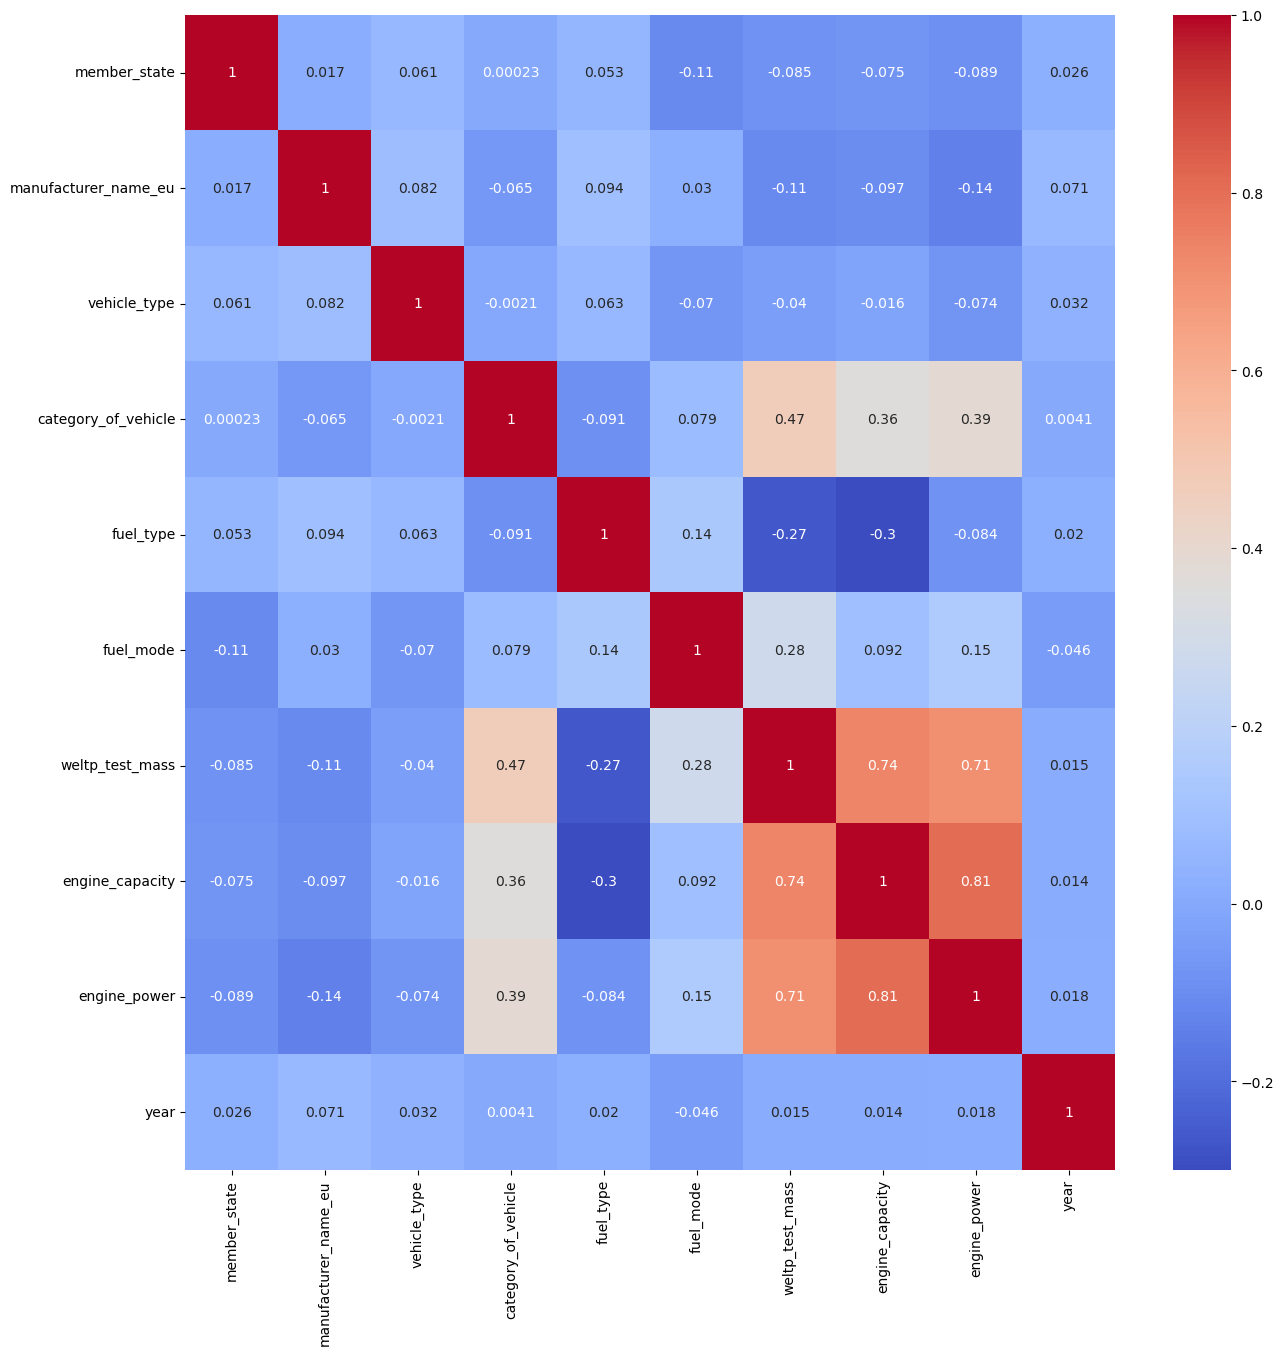

In [41]:
cor = X.corr()
fig, ax = plt.subplots(figsize= (15,15))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")

In [ ]:
X.head()

In [42]:
# Split the data in train and a test setz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2)

In [ ]:
# to get a first impression of several models we could try
# very computing intensive
from lazypredict.Supervised import REGRESSORS, LazyRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from config import OUTPUT_DIR 
from lazypredict.Supervised import REGRESSORS, LazyRegressor
lf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lf.fit(X_train, X_test, y_train, y_test)
# selection through ignore
model_selection = REGRESSORS
"""
----
Removed due to failed executions:
----
GaussianProcessRegressor model failed to execute
KernelRidge model failed to execute
LazyRegressor stuck at 62% (26/42) -> 25 MLPRegressor || 26 NuSVR?

----
Removed due to high compute time:
----
LassoCV
QuantileRegressor
RANSACRegressor

----
Compute error messages
----
LarsCV model failed to execute
Unable to allocate 4.07 GiB for an array with shape (1824768, 299) and data type float64

LassoLarsCV model failed to execute
Unable to allocate 4.07 GiB for an array with shape (1824768, 299) and data type float64
    
LassoLarsIC model failed to execute
Unable to allocate 7.04 GiB for an array with shape (2280960, 414) and data type float64
    
RidgeCV model failed to execute
Unable to allocate 5.10 GiB for an array with shape (2280960, 300) and data type float64

SVR -> stuck
"""
models_to_ignore = list([
    # "GaussianProcessRegressor",
    # "KernelRidge",
    # "LassoCV",
    # "NuSVR",
    # "MLPRegressor",
    # "QuantileRegressor",
    # "RANSACRegressor",
    # "LarsCV",
    # "LassoLarsCV",
    # "LassoLarsIC",
    # "RidgeCV",
    # "SVR"
])
#print(models)

In [ ]:
lass LazyPredictChunk:
    def __init__(self, models=None, predictions=None, regressors="all"):
        self.models = models
        self.predictions = predictions
        self.regressors = regressors

In [ ]:
print("Executing LazyRegressor through: ", len(lazy_predict_chunks), "chunks")

# save compute if executed without predictions
predictions_flag = False

for chunk in lazy_predict_chunks:
    print("Processings the following regressors in this chunk: ", chunk.regressors)
    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, regressors=chunk.regressors, predictions=predictions_flag)
    models,predictions = reg.fit(X_train, X_test, y_train, y_test)
    # models,predictions = reg.fit(X_train[:500], X_test[:500], y_train[:500], y_test[:500])

    # save trained models with joblib
    for model_name, model in reg.models.items():
        joblib.dump(model, f"{OUTPUT_DIR}models/{current_date}-lazy-{model_name}.pkl")

    # store results into LazyPredictChunk variables
    chunk.models = deepcopy(models) # deepcopy to not have weird references
    if predictions_flag:
        chunk.predictions = deepcopy(predictions)

In [ ]:
chunk_size = 1
lazy_predict_chunks = []

# split regressors into chunks
i = 0
chunk_buffer = []
for model, model_class in model_selection:
    # ignore models that are in ignore list
    if model in models_to_ignore:
        i+=1
        continue

    # append if chunk_buffer below size limit
    if len(chunk_buffer) < chunk_size:
        chunk_buffer.append((model, model_class))

    # chunk size reached or last iteration step reached
    if len(chunk_buffer) == chunk_size or (i+1) == len(REGRESSORS):
        lazy_predict_chunks.append(LazyPredictChunk(regressors=deepcopy(chunk_buffer)))
        # empty chunk_buffer
        chunk_buffer = []

    i+=1

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
lf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lf.fit(X_train, X_test, y_train, y_test)
# selection through ignore
model_selection = REGRESSORS
print(models)

In [ ]:
print("Executing LazyRegressor through: ", len(lazy_predict_chunks), "chunks")

# save compute if executed without predictions
predictions_flag = False

for chunk in lazy_predict_chunks:
    print("Processings the following regressors in this chunk: ", chunk.regressors)
    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, regressors=chunk.regressors, predictions=predictions_flag)
    models,predictions = reg.fit(X_train, X_test, y_train, y_test)
    # models,predictions = reg.fit(X_train[:500], X_test[:500], y_train[:500], y_test[:500])

    # save trained models with joblib
    for model_name, model in reg.models.items():
        joblib.dump(model, f"{OUTPUT_DIR}models/{current_date}-lazy-{model_name}.pkl")

    # store results into LazyPredictChunk variables
    chunk.models = deepcopy(models) # deepcopy to not have weird references
    if predictions_flag:
        chunk.predictions = deepcopy(predictions)

In [ ]:
# build combined results
all_models = pd.DataFrame()
all_predictions = pd.DataFrame()

for chunk in lazy_predict_chunks:
    all_models = pd.concat([all_models, chunk.models])
    if predictions_flag:
        all_predictions = pd.concat([all_predictions, chunk.predictions])

In [ ]:
output_file = OUTPUT_DIR + current_date + "-lazy_models.csv"
all_models.to_csv(output_file)
all_models

In [43]:
# Trying out LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Testing LinearRegression for predicting the CO2-emission   

lr = LinearRegression()
lr.fit(X_train, y_train)

#score of LinearRegression
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
print("score_train:",score_train)
print("score_test:",score_test)

# mean squared Error
y_pred_tr = lr.predict(X_train)
y_pred_te = lr.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


score_train: 0.4159819275910783
score_test: 0.4173049698949777
rmse training data:  32.34858016766589
rmse test data:  32.33238933047002


In [44]:
#trying out RidgeCV
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas =[0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)
print("alpha used:",ridge_reg.alpha_)
sc_train = ridge_reg.score(X_train, y_train)
sc_test = ridge_reg.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = ridge_reg.predict(X_train)
y_pred_te = ridge_reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

alpha used: 10.0
score:  0.4173050499127928
score:  0.4159819212081126
rmse training data:  32.34858034444113
rmse test data:  32.33238711046889


In [45]:
#trying out lasso  regression
from sklearn.linear_model import LassoCV
lasso_r = LassoCV()
lasso_r.fit(X_train, y_train)
#lasso coefficients:
print(lasso_r.coef_)
print("alpha used: ", lasso_r.alpha_)

#scores
sc_train = lasso_r.score(X_train, y_train)
sc_test = lasso_r.score(X_test, y_test)
print("score: ", sc_test)
print("score: ", sc_train)

# mean squared Error
y_pred_tr = lasso_r.predict(X_train)
y_pred_te = lasso_r.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_tr, y_train ))
rmse_te = np.sqrt(mean_squared_error(y_pred_te, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)


[-1.66781205e-01  7.30854373e-02 -1.78464983e-02  0.00000000e+00
 -4.68673095e+00 -1.64521836e+01 -1.33981449e+01  0.00000000e+00
  2.40330623e+01 -0.00000000e+00]
alpha used:  0.9830568164613799
score:  0.4113662049079593
score:  0.410316975712136
rmse training data:  32.50509151027442
rmse test data:  32.49673575659336


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

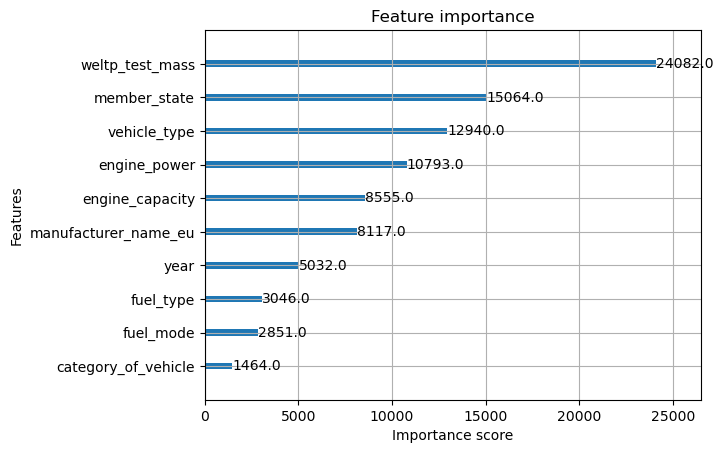

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, learning_rate =0.3,   max_depth=7, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

xgb.plot_importance(model, ax = plt.gca())




In [48]:

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
print("score: ", sc_train)
print("score: ", sc_test)

# mean squared Error
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_pred_train, y_train))
rmse_te = np.sqrt(mean_squared_error(y_pred_test, y_test))
print("rmse training data: ", rmse_tr)
print("rmse test data: ", rmse_te)

score:  0.9967240223289631
score:  0.9966549119609875
rmse training data:  2.4227720047980226
rmse test data:  2.4497452200614376


In [ ]:
# gridSearch für verschiedene Modelle
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Modelle und ihre Hyperparameter definieren
models = {
    #'XGBRegressoer': (XGBRegressor(), {'n_estimators': [10, 100, 500, 1000], 'learning_rate': [0.1, 0.3, 0.5]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 15]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]})
}

# Ergebnisse speichern
results = {}

# Grid-Search für jedes Modell durchführen
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }

# Ergebnisse ausgeben
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Beste Hyperparameter: {result['best_params']}")
    print(f"  Bester Score (MSE): {result['best_score']:.4f}\n")



KeyboardInterrupt: 

: 